In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import random
import pickle

In [2]:
img = image.load_img(r"C:\Users\Asus\OneDrive\Desktop\CatDog\train\cats\3.jpg")

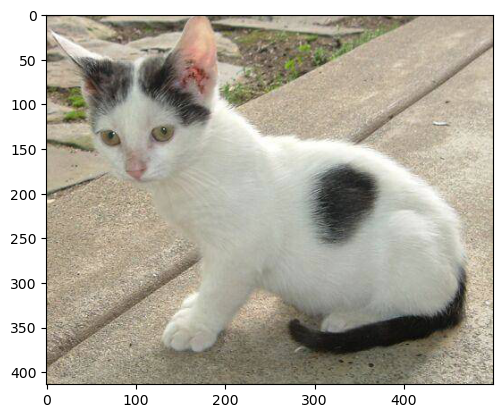

In [3]:
plt.imshow(img)

In [4]:
cv2.imread(r"C:\Users\Asus\OneDrive\Desktop\CatDog\train\cats\3.jpg")

array([[[142, 151, 160],
        [146, 155, 164],
        [151, 160, 170],
        ...,
        [156, 172, 185],
        [155, 171, 184],
        [154, 170, 183]],

       [[108, 117, 126],
        [112, 123, 131],
        [118, 127, 137],
        ...,
        [155, 171, 184],
        [154, 170, 183],
        [153, 169, 182]],

       [[108, 119, 127],
        [110, 123, 131],
        [118, 128, 138],
        ...,
        [156, 169, 183],
        [155, 168, 182],
        [154, 167, 181]],

       ...,

       [[162, 186, 198],
        [157, 181, 193],
        [142, 166, 178],
        ...,
        [181, 204, 206],
        [170, 193, 195],
        [149, 172, 174]],

       [[140, 164, 176],
        [147, 171, 183],
        [139, 163, 175],
        ...,
        [169, 187, 188],
        [125, 143, 144],
        [106, 124, 125]],

       [[154, 178, 190],
        [154, 178, 190],
        [121, 145, 157],
        ...,
        [183, 198, 200],
        [128, 143, 145],
        [127, 142, 144]]

In [5]:
train = ImageDataGenerator(rescale = 1/142)
validation = ImageDataGenerator(rescale = 1/142)

In [6]:
train_dataset = train.flow_from_directory(r'C:\Users\Asus\OneDrive\Desktop\CatDog\train',
                                          target_size = (200, 200),
                                          batch_size = 3,
                                          class_mode = 'binary')
validation_dataset = validation.flow_from_directory(r'C:\Users\Asus\OneDrive\Desktop\CatDog\validation',
                                                    target_size = (200, 200),
                                                      batch_size = 3,
                                                      class_mode = 'binary')

Found 20000 images belonging to 2 classes.
Found 25000 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'cats': 0, 'dogs': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                                            ])
                                    

C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss= 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
                metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch =3,
                      epochs=30,
                      validation_data= validation_dataset)

Epoch 1/30


C:\Users\Asus\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5000 - loss: 6.5830

In [ ]:
dir_path = 'C:\Users\Asus\OneDrive\Desktop\CatDog\test'

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("dog images")
    else:
        print("cat images")